## This exercise  is the application of Naive Bayes Algorithm for various Datasets

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

## Classifiy Wine into Different Categories

#### 1. Import Wine Dataset from Sklearn datset module 

In [5]:
wine_dataset= datasets.load_wine()

In [7]:
wine_dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [12]:
wine_df = pd.DataFrame(wine_dataset.data,columns=wine_dataset.feature_names)

In [13]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [16]:
X= wine_df  # Input features
y = wine_dataset.target # Target variables

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [22]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [23]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [31]:
Traget =  pd.DataFrame(y,columns=["Target"])

1    71
0    59
2    48
Name: Target, dtype: int64


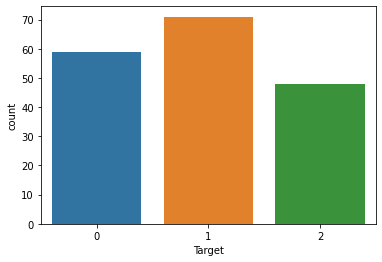

In [38]:
print(Traget["Target"].value_counts())
sns.countplot(Traget["Target"])

In [35]:
y = Traget["Target"]

#### Data Partitioning

In [42]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=20)

## Model Building -- Using Naive Bayes Algorithm

 #### Gausian Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB 

In [57]:
model_gnb = GaussianNB()
model_gnb.fit(X_train,y_train)

GaussianNB()

####  Model Evaluation

In [58]:
model_gnb.score(X_test,y_test)

0.9814814814814815

 #### Multi-Nominal Naive Bayes

In [62]:
from sklearn.naive_bayes import MultinomialNB

In [63]:
model_mnb = MultinomialNB()
model_mnb.fit(X_train,y_train)

MultinomialNB()

####  Model Evaluation


In [64]:
model_mnb.score(X_test,y_test)

0.8518518518518519

## 2. Spam Classifier


##### Import data from the local folder

In [67]:
import csv

In [87]:
#import necessary modules
import csv
Category = []
Message =[]

with open('D:\\Project\\CodeBasicsTasks\\NaiveBayes\\spam.csv','r')as f:
  data = csv.reader(f)
  for i in data:
        Category.append(i
                        [0])
        Message.append(i[1])


In [96]:
spam = pd.DataFrame({"Message":Message,"Category": Category})
spam

,Message,Category
0,Message,Category
1,"Go until jurong point, crazy.. Available only ...",ham
2,Ok lar... Joking wif u oni...,ham
3,Free entry in 2 a wkly comp to win FA Cup fina...,spam
4,U dun say so early hor... U c already then say...,ham
...,...,...
5568,This is the 2nd time we have tried 2 contact u...,spam
5569,Will Ã¼ b going to esplanade fr home?,ham
5570,"Pity, * was in mood for that. So...any other s...",ham
5571,The guy did some bitching but I acted like i'd...,ham


In [97]:
spam.drop(spam.index[:1], inplace=True)

In [98]:
spam

,Message,Category
1,"Go until jurong point, crazy.. Available only ...",ham
2,Ok lar... Joking wif u oni...,ham
3,Free entry in 2 a wkly comp to win FA Cup fina...,spam
4,U dun say so early hor... U c already then say...,ham
5,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5568,This is the 2nd time we have tried 2 contact u...,spam
5569,Will Ã¼ b going to esplanade fr home?,ham
5570,"Pity, * was in mood for that. So...any other s...",ham
5571,The guy did some bitching but I acted like i'd...,ham


In [99]:
spam.head()

,Message,Category
1,"Go until jurong point, crazy.. Available only ...",ham
2,Ok lar... Joking wif u oni...,ham
3,Free entry in 2 a wkly comp to win FA Cup fina...,spam
4,U dun say so early hor... U c already then say...,ham
5,"Nah I don't think he goes to usf, he lives aro...",ham


In [101]:
spam.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

ham     4825
spam     747
Name: Category, dtype: int64


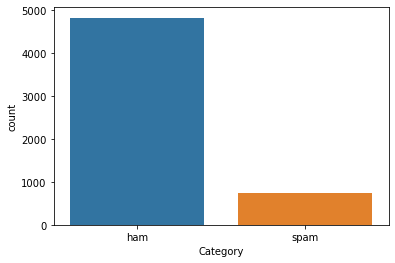

In [106]:
print(spam["Category"].value_counts())
sns.countplot(spam["Category"])


In [108]:
spam["spam"] = spam["Category"].apply(lambda x:1 if x=="spam" else 0)

In [110]:
spam_df = spam.drop("Category",axis =1 )

In [112]:
spam_df.head()

,Message,spam
1,"Go until jurong point, crazy.. Available only ...",0
2,Ok lar... Joking wif u oni...,0
3,Free entry in 2 a wkly comp to win FA Cup fina...,1
4,U dun say so early hor... U c already then say...,0
5,"Nah I don't think he goes to usf, he lives aro...",0


#### Data Splitting

In [130]:

X_train,X_test,y_train,y_test = train_test_split(spam["Message"],spam["spam"],test_size=0.3, random_state=20)

In [118]:
## Count Vectrorizer

from sklearn.feature_extraction.text import CountVectorizer

In [120]:
## Model
from sklearn.naive_bayes import from sklearn.naive_bayes import MultinomialNB


#### Import Pipeline

In [127]:


from sklearn.pipeline import Pipeline

model_spam=Pipeline([
    ("vectorizer",CountVectorizer() ),
    ("model",MultinomialNB() )   
    
])


In [131]:
model_spam.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('model', MultinomialNB())])

In [132]:
## Model Evaluation
model_spam.score(X_test,y_test)

0.9784688995215312

In [133]:
model_spam.predict(["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"])

array([1], dtype=int64)

In [136]:
model_spam.predict(["Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030"])

array([1], dtype=int64)

In [138]:
model_spam.predict(["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."])

array([0], dtype=int64)

In [139]:
model_spam.predict(["I‘m going to try for 2 months ha ha only joking"])

array([0], dtype=int64)

## 3. Identify people who survived or not survived in Titatnic

#### Importing Titanic Dataset from local folder

In [16]:
titatnic_df = pd.read_csv("D:\\Project\\CodeBasicsTasks\\NaiveBayes\\titanic.csv")

In [17]:
titatnic_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis="columns",inplace=True)

In [18]:
titatnic_df.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Survived'], dtype='object')

In [19]:
titatnic_df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [20]:
titatnic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
 4   Survived  891 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


From the above info  table itcan be interpreted that there are few null values in Age . Need to input NAN values.

In [21]:
titatnic_df["Age"]= titatnic_df["Age"].fillna(titatnic_df["Age"].mean())

#### Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label_encoder =LabelEncoder()

In [27]:
titatnic_df["Sex"] = label_encoder.fit_transform(titatnic_df["Sex"])


In [29]:
titatnic_df["Sex"].value_counts()

1    577
0    314
Name: Sex, dtype: int64

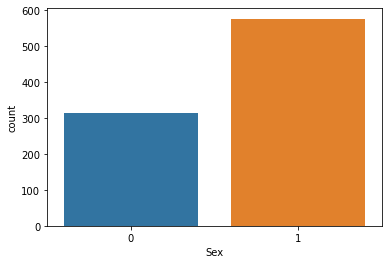

In [30]:
sns.countplot(titatnic_df["Sex"])

In [33]:
titatnic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   Survived  891 non-null    int64  
dtypes: float64(2), int32(1), int64(2)
memory usage: 31.4 KB


In [11]:
print(titatnic_df["Survived"].value_counts())

0    549
1    342
Name: Survived, dtype: int64


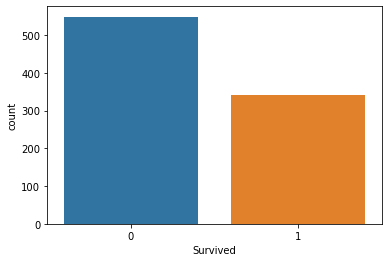

In [13]:
sns.countplot(titatnic_df["Survived"])

In [35]:
titatnic_df.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Survived'], dtype='object')

In [36]:
X= titatnic_df[['Pclass', 'Sex', 'Age', 'Fare']]
y = titatnic_df['Survived']

#### Data Partitioning

In [34]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=(0))

## Naive Bayes Model

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
titanic_model = GaussianNB()

In [40]:
titanic_model.fit(X_train,y_train)

GaussianNB()

## Model Evaluation

#### Training Accuracy

In [43]:
titanic_model.score(X_train,y_train)

0.7752808988764045

#### Test Accuracy

In [44]:
titanic_model.score(X_test,y_test)

0.7821229050279329

#### Predictions 

In [46]:
y_test[0:10]

495    0
648    0
278    0
31     1
255    1
298    1
609    1
318    1
484    1
367    1
Name: Survived, dtype: int64

In [45]:
titanic_model.predict(X_test[0:10])

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [49]:
titanic_model.predict_proba(X_test[0:10])

array([[9.63471232e-01, 3.65287681e-02],
       [9.62503957e-01, 3.74960426e-02],
       [9.32998881e-01, 6.70011187e-02],
       [1.32439579e-04, 9.99867560e-01],
       [3.94354021e-01, 6.05645979e-01],
       [7.77189410e-01, 2.22810590e-01],
       [7.09209722e-05, 9.99929079e-01],
       [1.86627331e-05, 9.99981337e-01],
       [2.85325302e-01, 7.14674698e-01],
       [3.89599775e-01, 6.10400225e-01]])

#### Using Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score

In [58]:
model_titanic= cross_val_score(GaussianNB(),X_train, y_train,cv=5)

In [59]:
model_titanic

array([0.72727273, 0.8041958 , 0.77464789, 0.76760563, 0.81690141])

In [60]:
model_titanic.mean()

0.7781246922091993